# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

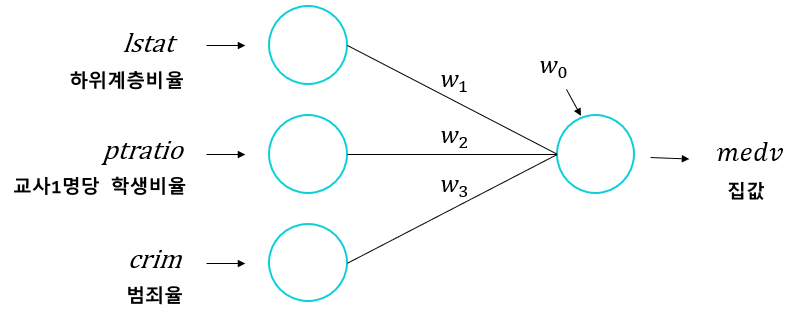

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [3]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [4]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [5]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [6]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [7]:
# 메모리 정리
clear_session()

# Sequential 타입
model=Sequential( [Input(shape=(nfeatures,)),
                   Dense(1)])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

In [11]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='mse')

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [12]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 600.9300 - val_loss: 555.5031
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 492.2279 - val_loss: 479.6603
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 429.8915 - val_loss: 416.1833
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 358.8734 - val_loss: 363.4253
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 317.4389 - val_loss: 321.1872
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 248.9234 - val_loss: 287.7314
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 233.0854 - val_loss: 261.8407
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 217.4050 - val_loss: 241.9210
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 199.5016 - val_loss: 225.7000
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.7534 - val_loss: 212.4458
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 185.5636 - val_loss: 201.8772
Epoch 12/30
11/11 ━━━━━━━━━━━

* 학습결과 그래프

In [13]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

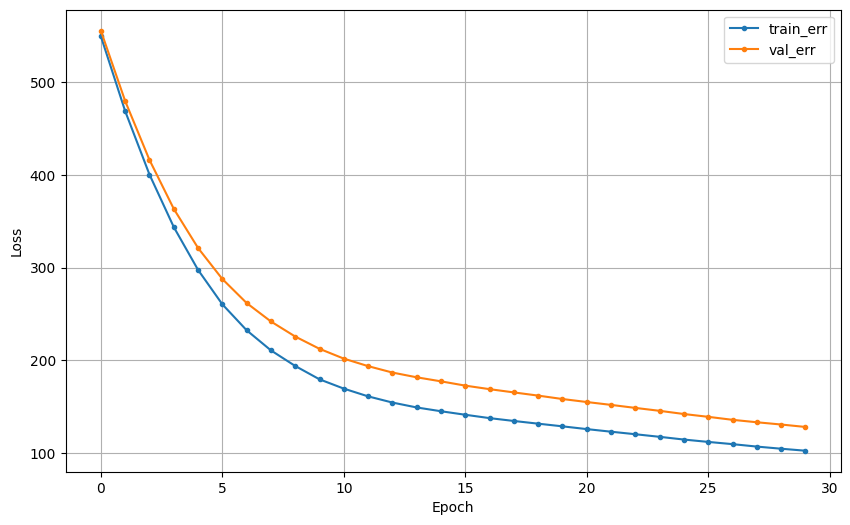

In [14]:
dl_history_plot(history)

### (3) 예측 및 검증

In [15]:
pred=model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [16]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 8.72178221402276
MAE  : 5.793481699625651
MAPE : 0.29793538507627265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [17]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [18]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [20]:
nfeatures=x_train.shape[1]
nfeatures

12

In [24]:
#메모리 정리
clear_session()

# Sequential 타입 모델 선언
model=Sequential( [Input(shape=(nfeatures, )),
                   Dense(1)])

# 모델 요약
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [28]:
model.compile(optimizer=Adam(learning_rate=0.1),loss='mse')

* 학습

In [42]:
result=model.fit(x_train,y_train, epochs = 35, validation_split=0.2).history

Epoch 1/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 50.7344 - val_loss: 47.6513
Epoch 2/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.8240 - val_loss: 46.5427
Epoch 3/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.9184 - val_loss: 45.1474
Epoch 4/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.0878 - val_loss: 44.5482
Epoch 5/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.1232 - val_loss: 43.6600
Epoch 6/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.2724 - val_loss: 43.3738
Epoch 7/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.4691 - val_loss: 42.5757
Epoch 8/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.8424 - val_loss: 41.8126
Epoch 9/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.2210 - val_loss: 41.9934
Epoch 10/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 45.0294 - val_loss: 40.3530
Epoch 11/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.4485 - val_loss: 40.0175
Epoch 12/35
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

* 학습결과 그래프

In [36]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

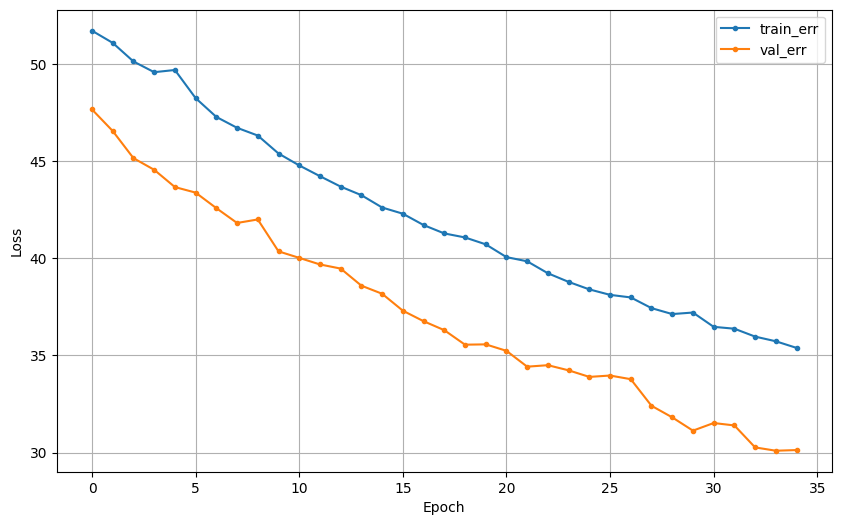

In [43]:
dl_history_plot(result)

* 예측 및 평가

In [39]:
pred=model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [41]:
print(root_mean_squared_error(y_val,pred))
print(mean_absolute_error(y_val,pred))
print(mean_absolute_percentage_error(y_val,pred))

6.337089622562819
4.735064485961317
0.2385631378717638


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [ ]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

* compile

* 학습

* 학습결과 그래프

* 예측 및 평가

----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [44]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [45]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [46]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [47]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'),
                     Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [48]:
model3.compile(optimizer=Adam(learning_rate=0.1),loss='mse')

* 학습

In [55]:
result=model3.fit(x_train,y_train,epochs=50,validation_split= .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 597.9824 - val_loss: 603.6882
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 539.2381 - val_loss: 556.0297
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 515.2407 - val_loss: 511.2864
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 429.4156 - val_loss: 470.1040
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 383.2528 - val_loss: 431.6323
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 361.0443 - val_loss: 396.6871
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 342.2654 - val_loss: 364.8303
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299.0712 - val_loss: 336.0859
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 302.1327 - val_loss: 309.5496
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 276.4815 - val_loss: 285.7523
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 242.3129 - val_loss: 264.1447
Epoch 12/50
11/11 ━━━━━━━━━━━

* 학습결과 그래프

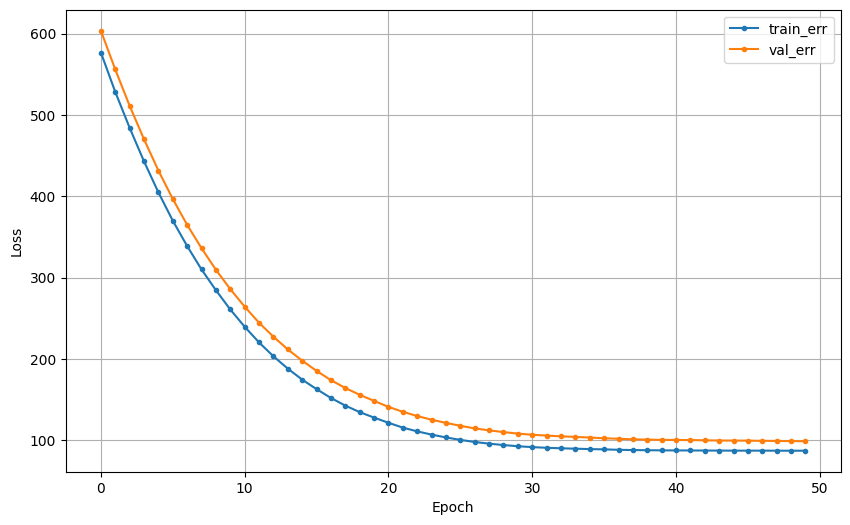

In [56]:
dl_history_plot(result)

* 예측 및 평가

In [53]:
pred=model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [54]:

print(root_mean_squared_error(y_val,pred))
print(mean_absolute_error(y_val,pred))
print(mean_absolute_percentage_error(y_val,pred))

4.772609791216298
3.7221270486420286
0.19240982854231004


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [62]:
clear_session()

model4=Sequential([Input(shape=(nfeatures,)),
                   Dense(8, activation='relu'),
                   Dense(1)])

model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [58]:
model4.compile(optimizer=Adam(learning_rate=0.1),loss='mse')

* 학습곡선

In [59]:
result1=model4.fit(x_train,y_train,epochs=50,validation_split= .2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 490.1497 - val_loss: 201.7509
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 189.1908 - val_loss: 131.4831
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.4497 - val_loss: 82.9888
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.6843 - val_loss: 58.3637
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.0538 - val_loss: 50.0053
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 57.6203 - val_loss: 44.2543
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.3839 - val_loss: 39.4728
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 44.7249 - val_loss: 34.6712
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.8235 - val_loss: 29.8421
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.9455 - val_loss: 23.8026
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.9858 - val_loss: 21.1639
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms

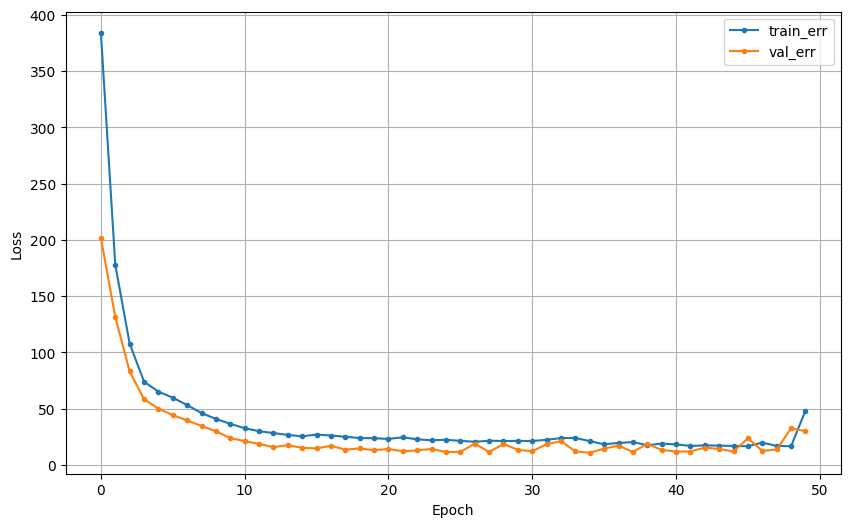

In [60]:
dl_history_plot(result1)

* 검증

In [67]:
pred=model4.predict(x_val)

print(root_mean_squared_error(y_val,pred))
print(mean_absolute_error(y_val,pred))
print(mean_absolute_percentage_error(y_val,pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
23.38373210444541
21.996128298966767
1.0214948991068278


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 | node, input_shape, activation |
| dense_1 (Dense) | (None, 4) | 36 | node, activation |
| dense_2 (Dense) | (None, 1) | 5 | node |

In [61]:
clear_session()

model5=Sequential([Input(shape=(nfeatures,)),
                   Dense(8,activation='relu'),
                   Dense(4,activation='relu'),
                   Dense(1)])

model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [63]:
model5.compile(optimizer= Adam(learning_rate=0.1),loss='mse')

In [64]:
result3=model5.fit(x_train,y_train,epochs=50,validation_split=0.2).history

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 482.0377 - val_loss: 192.5899
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 150.1238 - val_loss: 91.6040
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 87.4459 - val_loss: 63.6547
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.3187 - val_loss: 45.7761
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.0468 - val_loss: 56.3651
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.0562 - val_loss: 36.6206
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.2998 - val_loss: 37.1724
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.7297 - val_loss: 37.2051
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.4637 - val_loss: 19.6130
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.9643 - val_loss: 16.9518
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.0917 - val_loss: 14.7696
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

* 학습곡선

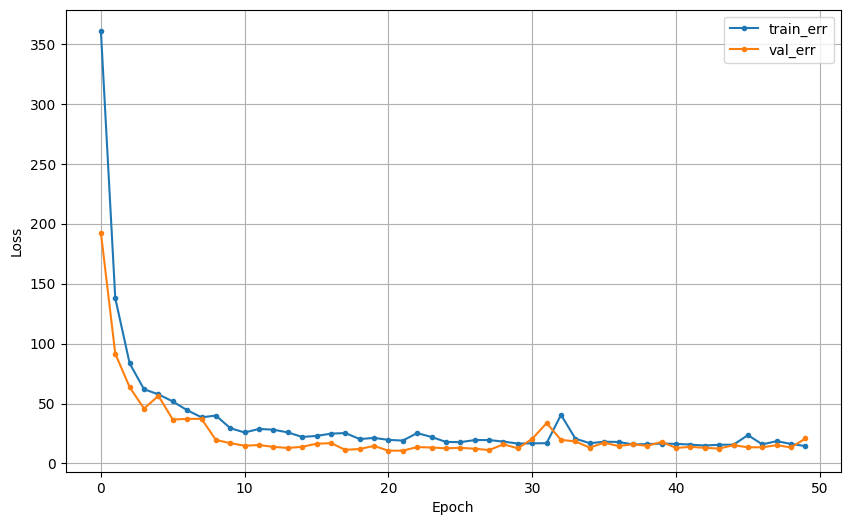

In [65]:
dl_history_plot(result3)

* 검증

In [68]:
pred=model5.predict(x_val)

print(root_mean_squared_error(y_val,pred))
print(mean_absolute_error(y_val,pred))
print(mean_absolute_percentage_error(y_val,pred))

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4.282579951162052
3.0909553583930522
0.15210978839126002


* 회귀 모델 예측값 vs 실제값 그래프

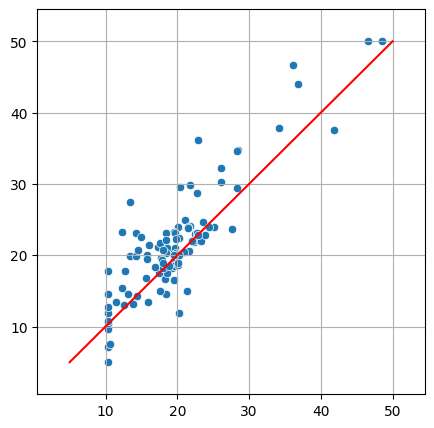

In [70]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values) #x가 예측값, y가 실제값
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

visualization_result(y_val,pred)